In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
#컬럼 한꺼번에보기
from IPython.display import display
pd.options.display.max_columns = None
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [21]:
df = pd.read_csv('dataset/lmember_0222.csv',encoding='cp949')

df.head()

,CUST_NO,GENDER,AGE,AREA,SHOP_A_CNT,SHOP_B_CNT,SHOP_C_CNT,RECEIPT_CNT,STORE_CNT,AM_CNT,PM_CNT,OT_CNT,AM_AMT,PM_AMT,OT_AMT,Q1401_AMT,Q1402_AMT,Q1403_AMT,Q1404_AMT,Q1501_AMT,Q1502_AMT,Q1503_AMT,Q1504_AMT,Y14_AMT,Y15_AMT,주류_CNT,육류_CNT,간식류_CNT,건강식품_CNT,농산물_CNT,수산물_CNT,식사류반찬_CNT,음료_CNT,주류_AMT,육류_AMT,간식류_AMT,건강식품_AMT,농산물_AMT,수산물_AMT,식사류반찬_AMT,음료_AMT,COMPETITOR,MEMBERSHIP,ON_LINE,MOBILE,TOTAL_AMT
0,1,M,60세이상,2,506,44,101,326,9,402,249,0,7999193,3896727,0,1765020,2982185,1182800,1905392,1747845,1153940,584270,574468,7835397,4060523,10,32,221,9,210,49,75,42,263750,684741,3246090,3084870,2502759,871740,725300,448970,1,0,0,0,11895920
1,2,M,60세이상,1,711,0,0,346,2,529,182,0,11786840,3175020,0,2907240,2446790,1844100,1835670,1903230,940500,1352190,1732140,9033800,5928060,26,44,162,3,358,43,51,24,152440,884510,2711870,354750,7559400,1782520,865770,650600,1,0,0,0,14961860
2,3,M,60세이상,2,0,1,1027,468,3,971,57,0,2649181,151846,0,302182,446083,573288,332446,255880,282380,364157,244611,1653999,1147028,483,15,97,0,184,31,55,163,687620,107945,273750,0,706792,212790,255880,556250,0,0,0,0,2801027
3,4,F,60세이상,2,498,91,127,383,4,533,183,0,4253139,1506441,0,597753,1016133,497890,363920,926382,878445,703252,775805,2475696,3283884,7,26,210,8,285,14,112,54,31140,307526,1800600,173900,1942124,115900,1084660,303730,1,0,0,0,5759580
4,5,M,60세이상,1,633,1,0,368,2,441,193,0,6478630,1887660,0,1787460,1508600,1027940,398440,1171780,802450,0,1669620,4722440,3643850,28,9,320,17,206,25,3,26,276290,168850,3660700,2277230,1230530,350740,63750,338200,0,0,0,0,8366290


In [22]:
# 주소지 분류

new_area_df = pd.read_csv('dataset/new_area.csv', encoding='ms949')
new_area_df.head()

,CUST_NO,NEW_AREA
0,1,서울 강남구
1,2,경기 김포시
2,3,서울 은평구
3,4,서울 노원구
4,5,경기 김포시


In [23]:
df['ADDR'] = new_area_df['NEW_AREA']

In [24]:
df.ADDR = df.ADDR.replace('경기 하남시','서울 도봉구')
df['ADDR'].fillna('미기재',inplace=True)

def get_category(pos):
    cat=''
    if pos in '경기 김포시':
        cat = 'LOC_S'
    elif pos in ['부산', '서울 송파구','인천']:
        cat = "LOC_A"
    elif pos in ['서울 강남구','충북','서울 양천구','강원','서울 서초구','서울 동작구','서울 용산구','서울 도봉구','광주']:
        cat = 'LOC_R'
    elif pos in ['경북','충남', '서울 노원구','경남','대전','서울 성동구','서울 성북구','서울 강북구','서울 성북구',
        '서울 강서구','서울 서대문구','미기재','서울 영등포구','서울 마포구','서울 은평구']:
        cat = 'LOC_B'
    elif pos in ['전북', '서울 동대문구','서울 광진구','전남','서울 관악구','서울 강동구','서울 중랑구',
                 '서울 종로구','서울 중구','서울 금천구','세종','제주']:
        cat = 'LOC_N'
    else: cat = '다시'
    return cat

df["ADDR_cleaned"] = df.ADDR.apply(lambda x : get_category(x))
df["ADDR_cleaned"].value_counts()

LOC_S    5992
LOC_B    4625
LOC_A    4424
LOC_R    2341
LOC_N    1995
Name: ADDR_cleaned, dtype: int64

In [35]:
# 장보기 목적 분류: (육류 농산물 수산물 식사류반찬), (간식 음료), (건강식품), (주류)

df['Grocery_AMT'] = df.Meat_AMT + df.FarmF_AMT + df.SeaF_AMT + df.SideF_AMT
df['SnackDrink_AMT'] = df.Snack_AMT + df.Drink_AMT
purpose_df = df[['Grocery_AMT', 'SnackDrink_AMT', 'Health_AMT', 'Alcohol_AMT']]
purpose_df.head()

,Grocery_AMT,SnackDrink_AMT,Health_AMT,Alcohol_AMT
0,4784540,3695060,3084870,263750
1,11092200,3362470,354750,152440
2,1283407,830000,0,687620
3,3450210,2104330,173900,31140
4,1813870,3998900,2277230,276290


In [36]:
# 분류 근거

In [37]:
!pip install factor-analyzer

  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40380 sha256=6f261d37fc56531df0e488fece9fa8dfe1393af7e2b5f3e5dd1f2397ed3c6cdf
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\8d\9e\4c\fd4cb92cecf157b13702cc0907e5c56ddc48e5388134dc9f1a
Successfully built factor-analyzer


In [38]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

data_cnt = df[['주류_CNT', '육류_CNT', '간식류_CNT', '건강식품_CNT', '농산물_CNT',
       '수산물_CNT', '식사류반찬_CNT', '음료_CNT','TOTAL_AMT']]
chi_square_value,p_value=calculate_bartlett_sphericity(data_cnt)
chi_square_value,p_value

(66231.64746199525, 0.0)

In [39]:
kmo_all,kmo_model = calculate_kmo(data_cnt)
kmo_model

0.8497825042743705

In [40]:
fa =FactorAnalyzer(n_factors =25, rotation=None)
fa.fit(data_cnt)
ev, v =fa.get_eigenvalues()
ev

array([3.83251499, 1.15041877, 0.99937248, 0.90583658, 0.76940708,
       0.50765327, 0.32999325, 0.25695454, 0.24784904])

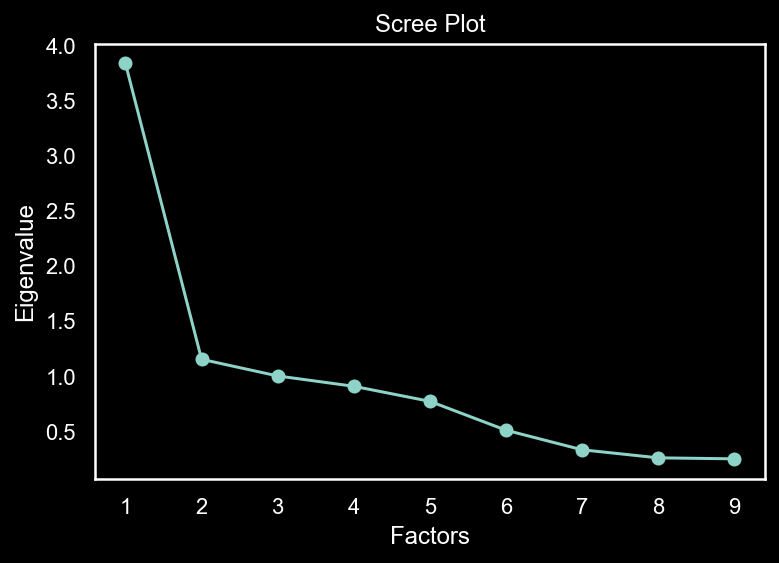

In [41]:
sns.set(rc={"axes.unicode_minus":False},
        style='darkgrid') #sns 한글깨짐
#그래프 세팅
font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 16,
        }
plt.style.use('dark_background')
plt.scatter(range(1, data_cnt.shape[1]+1),ev)
plt.plot(range(1, data_cnt.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [42]:
fa = FactorAnalyzer(n_factors = 4, rotation ='varimax')
fa.fit(data_cnt)
efa_result = pd.DataFrame(fa.loadings_, index = data_cnt.columns)
efa_result

,0,1,2,3
주류_CNT,0.083919,0.157958,-0.024332,0.597783
육류_CNT,0.808701,0.269756,-0.002585,0.145257
간식류_CNT,0.358845,0.598224,-0.019068,0.229910
건강식품_CNT,0.015945,-0.052854,0.994217,-0.059185
농산물_CNT,0.825815,0.231759,0.025822,0.052971
수산물_CNT,0.836277,0.169219,0.031865,0.142035
식사류반찬_CNT,0.563639,0.376936,0.046343,-0.012681
음료_CNT,0.299106,0.860300,-0.005971,0.195627
TOTAL_AMT,0.071502,0.040874,0.052973,0.017501


<AxesSubplot:>

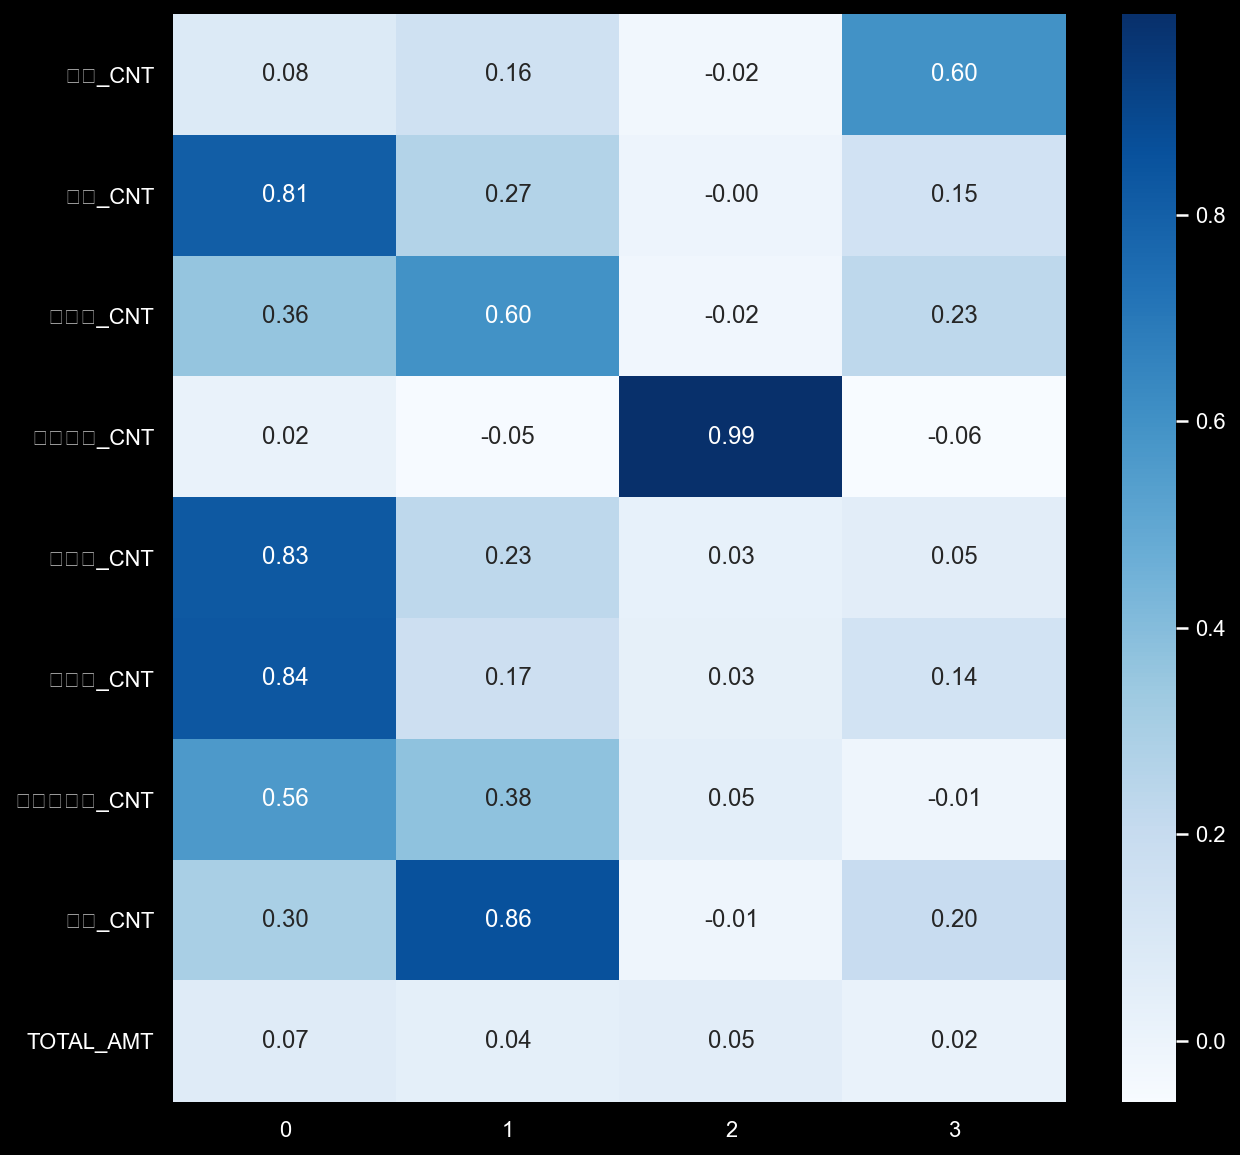

In [43]:
# 연관성 시각화
font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 16,
        }
plt.figure(figsize=(10,10))

sns.heatmap(efa_result, cmap='Blues', annot= True, fmt = '.2f')

In [44]:
# 비교 위해서 스케일링
from sklearn.preprocessing import StandardScaler
purpose_scaled = StandardScaler().fit_transform(purpose_df)
purpose_df_scaled = pd.DataFrame(purpose_scaled, columns=purpose_df.columns)
purpose_df_scaled.head()

,Grocery_AMT,SnackDrink_AMT,Health_AMT,Alcohol_AMT
0,-0.000917,0.021465,1.462417,-0.040447
1,0.589604,0.007011,-0.059679,-0.059226
2,-0.328692,-0.103042,-0.257459,0.031066
3,-0.125837,-0.047664,-0.160507,-0.079692
4,-0.279030,0.034669,1.012142,-0.038331


In [45]:
# 고객별 장보기 주요 목적을 1로 표시하는 칼럼 생성

pdf = purpose_df_scaled.copy()

pdf['PUR_T_Grocery'] = (pdf['Grocery_AMT']>pdf['SnackDrink_AMT']) & (pdf['Grocery_AMT']>pdf['Health_AMT']) &\
(pdf['Grocery_AMT']>pdf['Alcohol_AMT'])

pdf['PUR_T_SnackDrink'] = (pdf['SnackDrink_AMT']>pdf['Grocery_AMT']) & (pdf['SnackDrink_AMT']>pdf['Health_AMT']) &\
(pdf['SnackDrink_AMT']>pdf['Alcohol_AMT'])

pdf['PUR_T_Health'] = (pdf['Health_AMT']>pdf['SnackDrink_AMT']) & (pdf['Health_AMT']>pdf['Grocery_AMT']) &\
(pdf['Health_AMT']>pdf['Alcohol_AMT'])

pdf['PUR_T_Alcohol'] = (pdf['Alcohol_AMT']>pdf['SnackDrink_AMT']) & (pdf['Alcohol_AMT']>pdf['Health_AMT']) &\
(pdf['Alcohol_AMT']>pdf['Grocery_AMT'])

print('식료품 구매 비중이 가장 높은 고객수: ',pdf['PUR_T_Grocery'].value_counts())
print('간식, 음료 구매 비중이 가장 높은 고객수: ',pdf['PUR_T_SnackDrink'].value_counts())
print('건강식품 구매 비중이 가장 높은 고객수: ',pdf['PUR_T_Health'].value_counts())
print('주류 구매 비중이 가장 높은 고객수: ',pdf['PUR_T_Alcohol'].value_counts())

pdf['PUR_T_Grocery'].replace(True,1,inplace=True)
pdf['PUR_T_Grocery'].replace(False,0,inplace=True)
pdf['PUR_T_SnackDrink'].replace(True,1,inplace=True)
pdf['PUR_T_SnackDrink'].replace(False,0,inplace=True)
pdf['PUR_T_Health'].replace(True,1,inplace=True)
pdf['PUR_T_Health'].replace(False,0,inplace=True)
pdf['PUR_T_Alcohol'].replace(True,1,inplace=True)
pdf['PUR_T_Alcohol'].replace(False,0,inplace=True)

식료품 구매 비중이 가장 높은 고객수:  False    13068
True      6309
Name: PUR_T_Grocery, dtype: int64
간식, 음료 구매 비중이 가장 높은 고객수:  False    14423
True      4954
Name: PUR_T_SnackDrink, dtype: int64
건강식품 구매 비중이 가장 높은 고객수:  False    16192
True      3185
Name: PUR_T_Health, dtype: int64
주류 구매 비중이 가장 높은 고객수:  False    14448
True      4929
Name: PUR_T_Alcohol, dtype: int64


In [46]:
# df에 장보기목적 컬럼 추가
pdf.drop(['Grocery_AMT','SnackDrink_AMT','Health_AMT','Alcohol_AMT'], axis=1, inplace=True)
df = pd.concat([df, pdf], axis=1)
df.head()

,CUST_NO,GENDER,AGE,AREA,SHOP_A_CNT,SHOP_B_CNT,SHOP_C_CNT,RECEIPT_CNT,STORE_CNT,AM_CNT,PM_CNT,OT_CNT,AM_AMT,PM_AMT,OT_AMT,Q1401_AMT,Q1402_AMT,Q1403_AMT,Q1404_AMT,Q1501_AMT,Q1502_AMT,Q1503_AMT,Q1504_AMT,Y14_AMT,Y15_AMT,주류_CNT,육류_CNT,간식류_CNT,건강식품_CNT,농산물_CNT,수산물_CNT,식사류반찬_CNT,음료_CNT,Alcohol_AMT,Meat_AMT,Snack_AMT,Health_AMT,FarmF_AMT,SeaF_AMT,SideF_AMT,Drink_AMT,COMPETITOR,MEMBERSHIP,ON_LINE,MOBILE,TOTAL_AMT,ADDR,ADDR_cleaned,TOTAL_AMT_CAT,SHOP_T_A,SHOP_T_B,SHOP_T_C,TA_S,Alcohol_p_t,Meat_p_t,Snack_p_t,Health_p_t,FarmF_p_t,SeaF_p_t,SideF_p_t,Drink_p_t,Alcohol_p1,Meat_p1,Snack_p1,Health_p1,FarmF_p1,SeaF_p1,SideF_p1,Drink_p1,TOTAL_CAT_p,log_TOTAL_AMT,log_Alcohol_p1,log_Meat_p1,log_Snack_p1,log_Health_p1,log_FarmF_p1,log_SeaF_p1,log_SideF_p1,log_Drink_p1,Grocery_AMT,SnackDrink_AMT,PUR_T_Grocery,PUR_T_SnackDrink,PUR_T_Health,PUR_T_Alcohol
0,1,M,60세이상,2,506,44,101,326,9,402,249,0,7999193,3896727,0,1765020,2982185,1182800,1905392,1747845,1153940,584270,574468,7835397,4060523,10,32,221,9,210,49,75,42,263750,684741,3246090,3084870,2502759,871740,725300,448970,1,0,0,0,11895920,서울 강남구,LOC_R,80_100퍼구매금액군,1.0,0.0,0.0,A100,22.0,58.0,273.0,259.0,210.0,73.0,61.0,38.0,2.232,9.12,66.52,13.95,47.20,6.84,5.88,5.18,1.857465e+08,16.291706,1.173101,2.314514,4.212424,2.704711,3.875359,2.059239,1.928619,1.821318,4784540,3695060,0.0,0.0,1.0,0.0
1,2,M,60세이상,1,711,0,0,346,2,529,182,0,11786840,3175020,0,2907240,2446790,1844100,1835670,1903230,940500,1352190,1732140,9033800,5928060,26,44,162,3,358,43,51,24,152440,884510,2711870,354750,7559400,1782520,865770,650600,1,0,0,0,14961860,경기 김포시,LOC_S,80_100퍼구매금액군,1.0,0.0,0.0,A100,10.0,59.0,181.0,24.0,505.0,119.0,58.0,43.0,1.560,9.26,44.44,2.20,112.10,10.52,5.64,5.73,5.382542e+07,16.521015,0.940007,2.328253,3.816393,1.163151,4.728272,2.444085,1.893112,1.906575,11092200,3362470,1.0,0.0,0.0,0.0
2,3,M,60세이상,2,0,1,1027,468,3,971,57,0,2649181,151846,0,302182,446083,573288,332446,255880,282380,364157,244611,1653999,1147028,483,15,97,0,184,31,55,163,687620,107945,273750,0,706792,212790,255880,556250,0,0,0,0,2801027,서울 은평구,LOC_B,20퍼구매금액군,0.0,0.0,1.0,C20,245.0,39.0,98.0,0.0,252.0,76.0,91.0,199.0,14.720,6.46,24.52,1.00,56.44,7.08,8.28,22.89,1.765864e+08,14.845497,2.754934,2.009555,3.239462,0.693147,4.050741,2.089392,2.227862,3.173460,1283407,830000,0.0,0.0,0.0,1.0
3,4,F,60세이상,2,498,91,127,383,4,533,183,0,4253139,1506441,0,597753,1016133,497890,363920,926382,878445,703252,775805,2475696,3283884,7,26,210,8,285,14,112,54,31140,307526,1800600,173900,1942124,115900,1084660,303730,1,0,0,0,5759580,서울 노원구,LOC_B,20_40퍼구매금액군,1.0,0.0,0.0,A40,5.0,53.0,313.0,30.0,337.0,20.0,188.0,53.0,1.280,8.42,76.12,2.50,75.14,2.60,16.04,6.83,4.389656e+07,15.566375,0.824175,2.242835,4.345363,1.252763,4.332574,1.280934,2.835564,2.057963,3450210,2104330,0.0,1.0,0.0,0.0
4,5,M,60세이상,1,633,1,0,368,2,441,193,0,6478630,1887660,0,1787460,1508600,1027940,398440,1171780,802450,0,1669620,4722440,3643850,28,9,320,17,206,25,3,26,276290,168850,3660700,2277230,1230530,350740,63750,338200,0,0,0,0,8366290,경기 김포시,LOC_S,60_80퍼구매금액군,1.0,0.0,0.0,A80,33.0,20.0,438.0,272.0,147.0,42.0,8.0,40.0,2.848,3.80,106.12,14.60,33.34,4.36,1.64,5.40,2.158556e+07,15.939721,1.347554,1.568616,4.673950,2.747271,3.536311,1.678964,0.970779,1.856298,1813870,3998900,0.0,0.0,1.0,0.0
